 Found 12 image(s) to process.

 Screenshot 2025-06-20 at 2.00.44 PM.png
 Red area: 9577.0,  Yellow area: 311.0,  Green area: 0



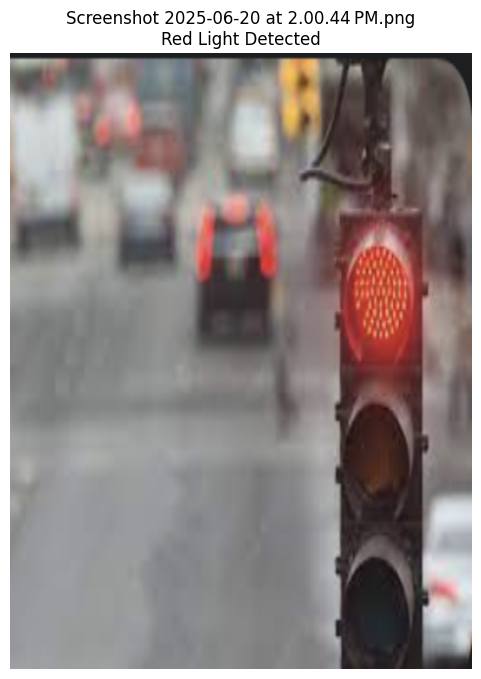

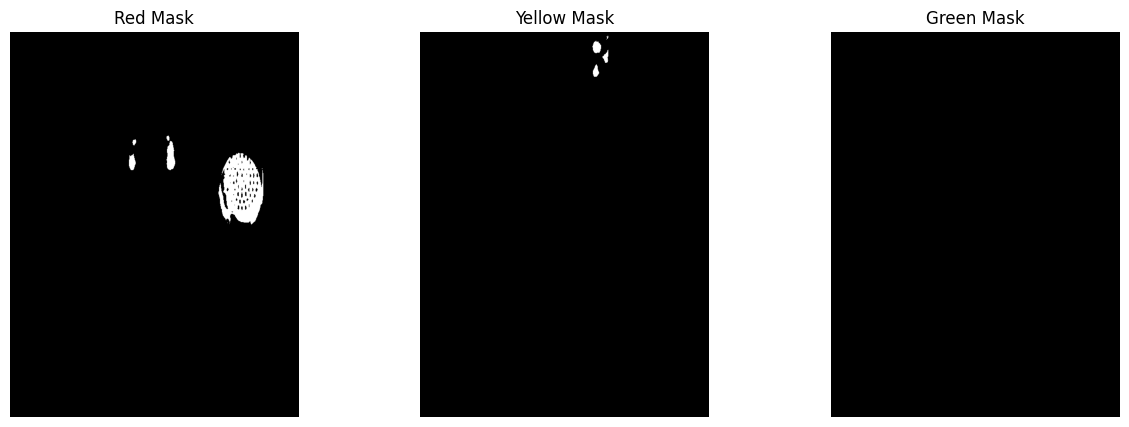

 Screenshot 2025-06-20 at 1.59.42 PM.png
 Red area: 6303.5,  Yellow area: 2271.0,  Green area: 9.0



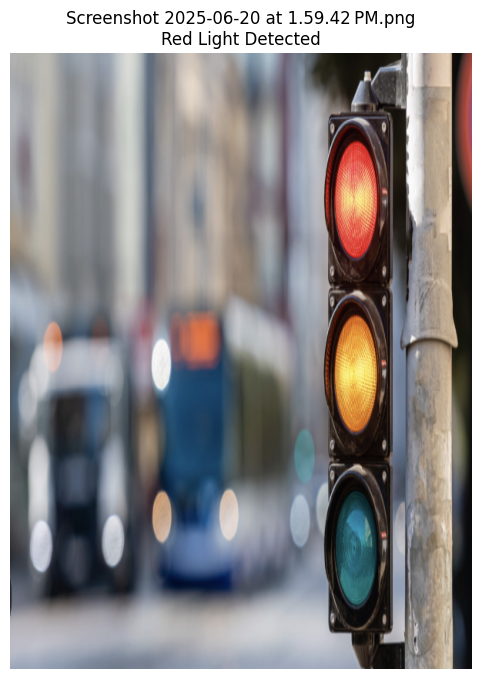

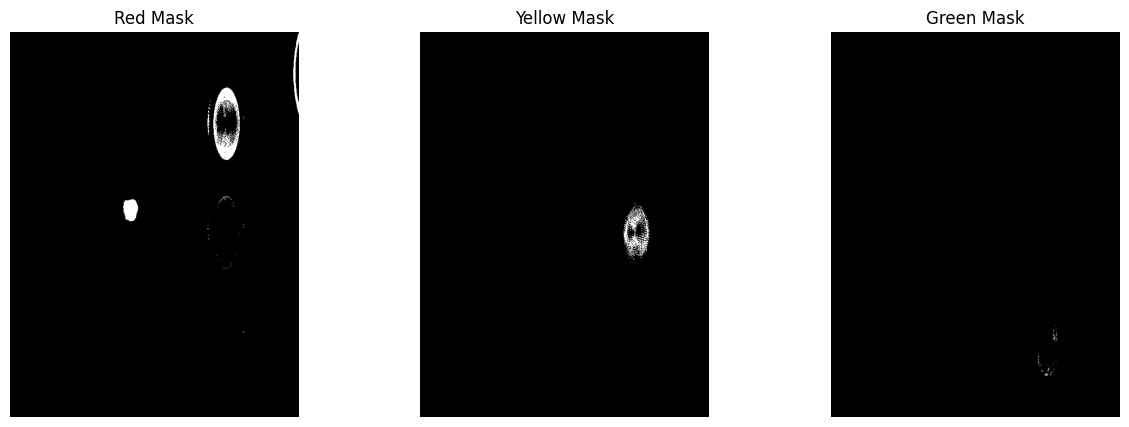

 Screenshot 2025-06-20 at 1.59.50 PM.png
 Red area: 4283.5,  Yellow area: 1068.0,  Green area: 189.0



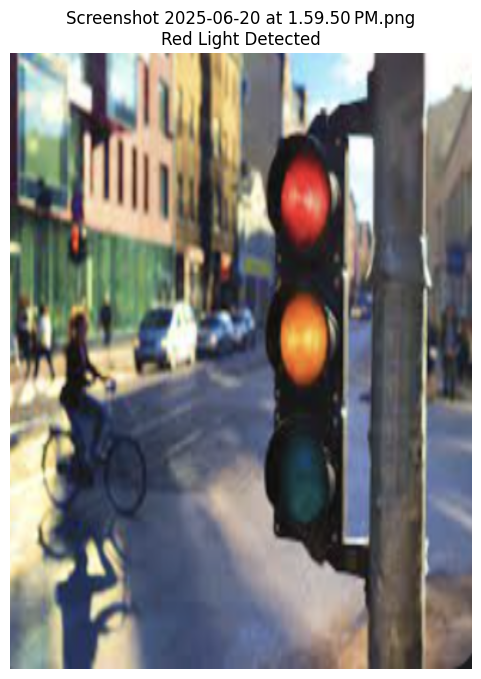

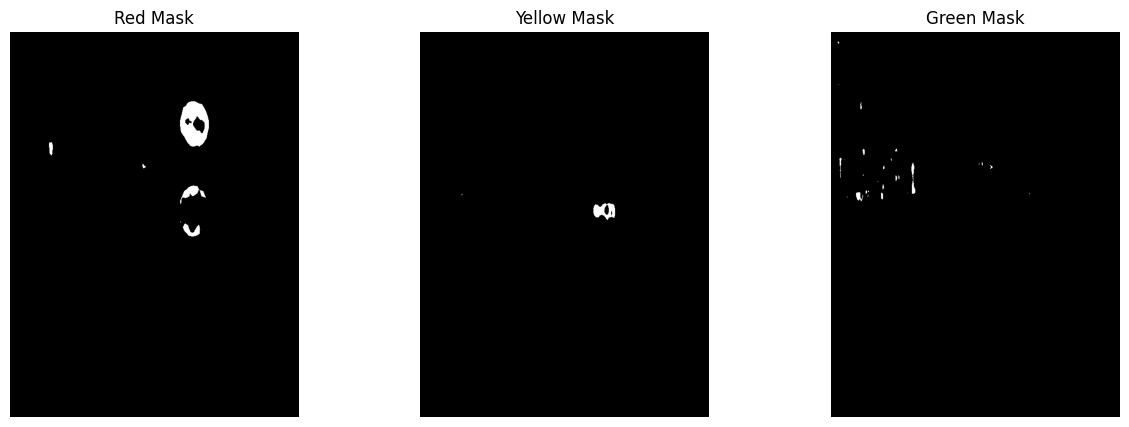

 Screenshot 2025-06-20 at 2.00.01 PM.png
 Red area: 5657.5,  Yellow area: 0,  Green area: 1285.5



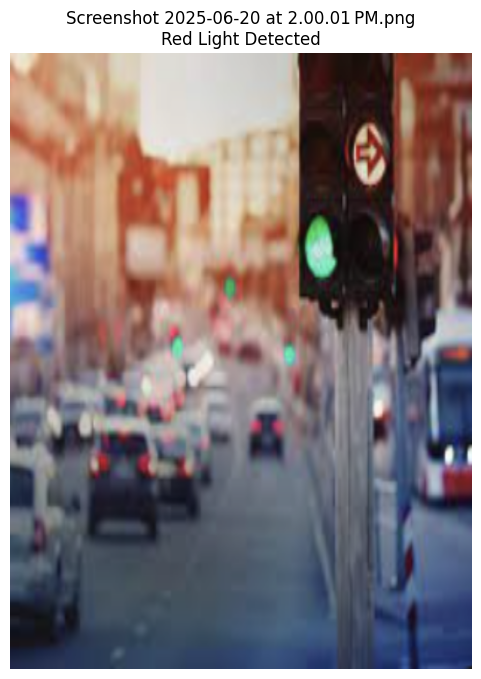

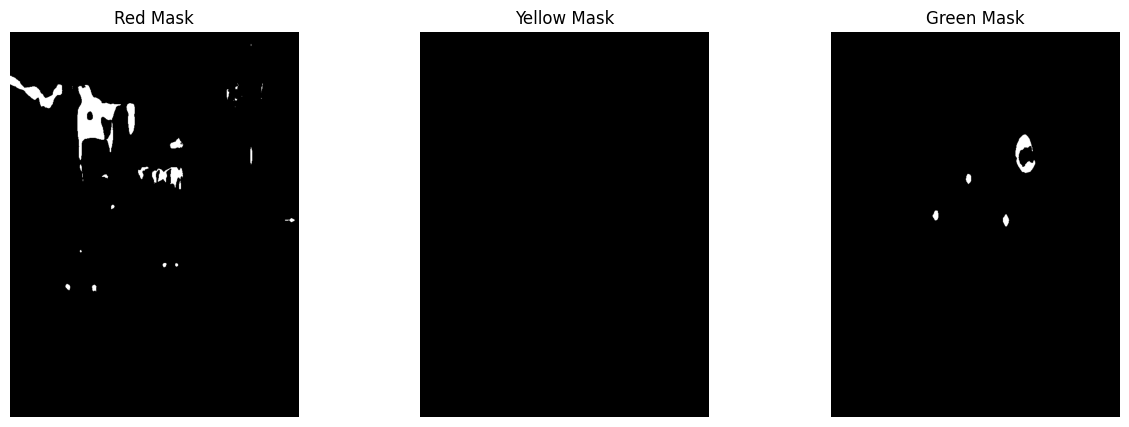

 Screenshot 2025-06-20 at 2.00.37 PM.png
 Red area: 49142.0,  Yellow area: 0,  Green area: 0



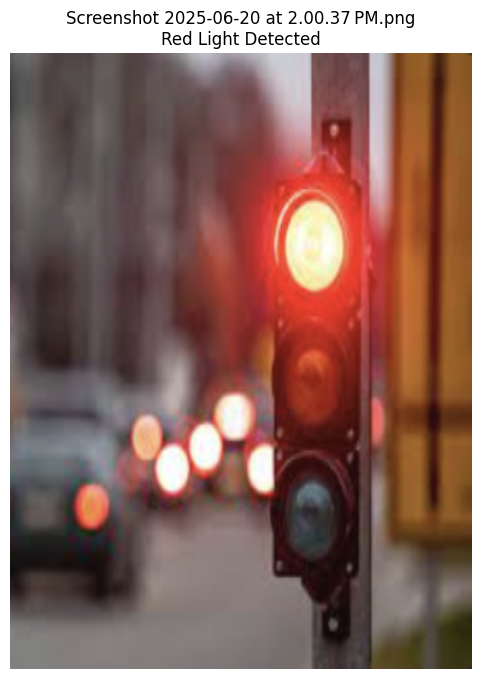

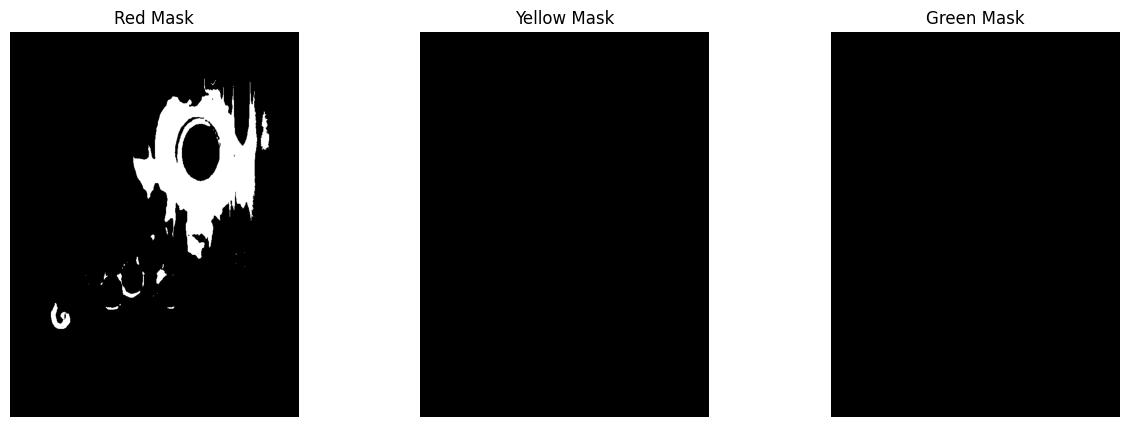

 Screenshot 2025-06-20 at 2.00.29 PM.png
 Red area: 725.0,  Yellow area: 0,  Green area: 1401.0



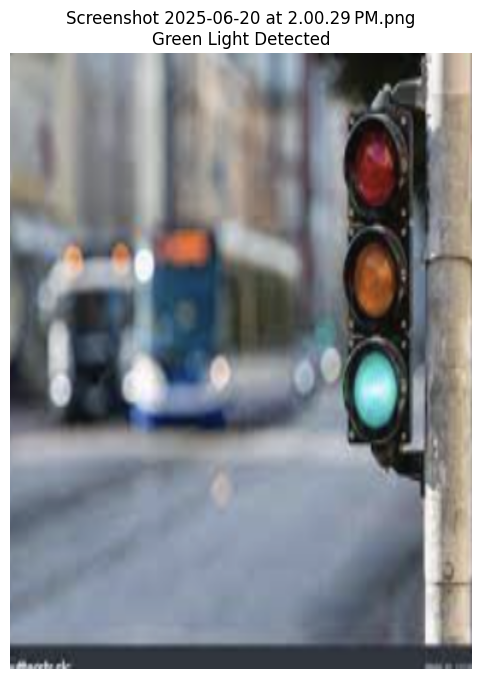

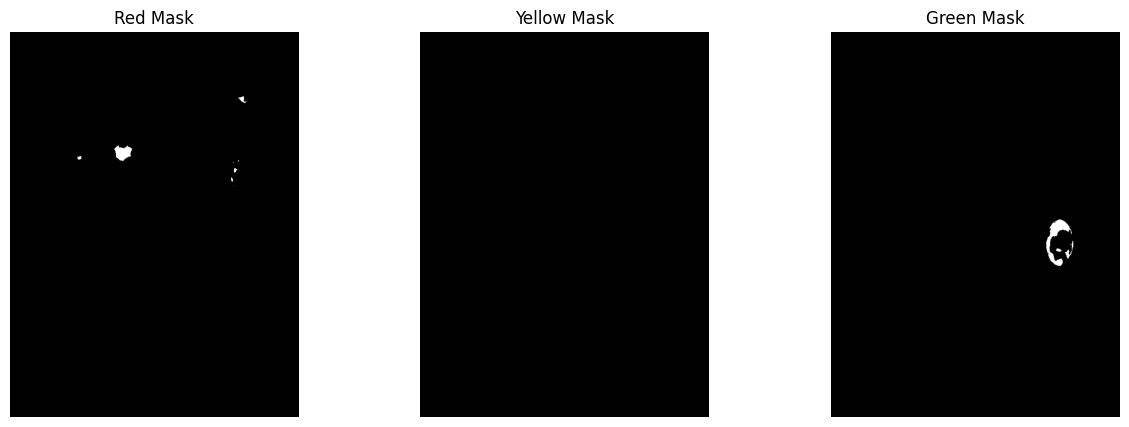

 Screenshot 2025-06-20 at 2.00.19 PM.png
 Red area: 26471.5,  Yellow area: 0,  Green area: 0



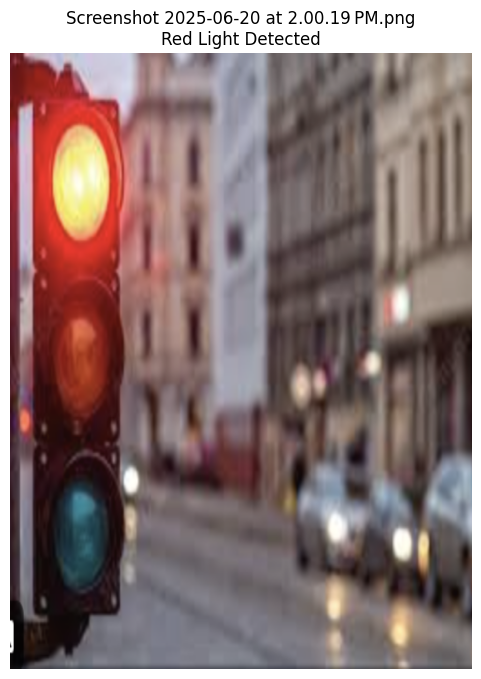

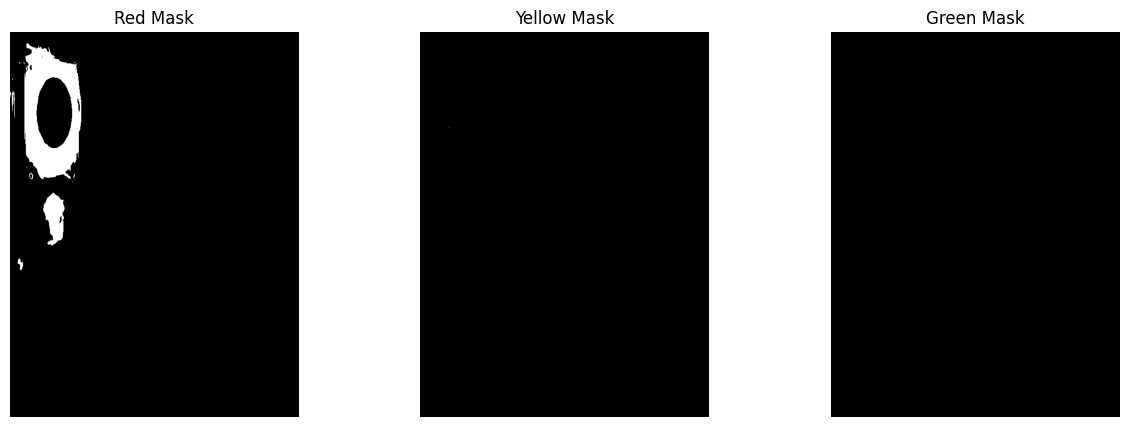

 Screenshot 2025-06-20 at 2.01.01 PM.png
 Red area: 3156.0,  Yellow area: 472.5,  Green area: 601.0



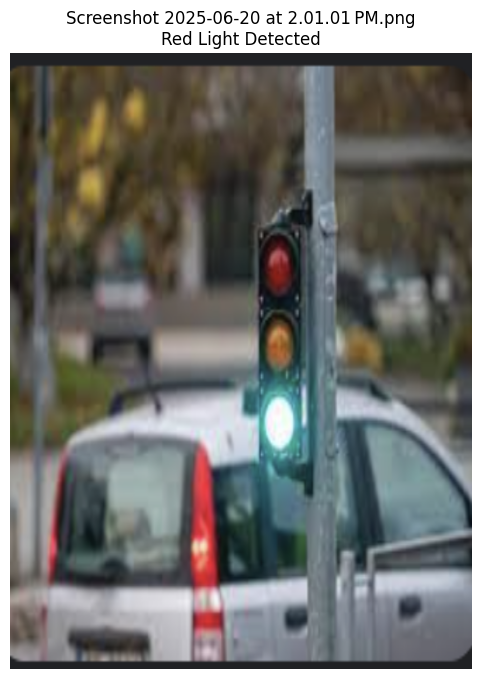

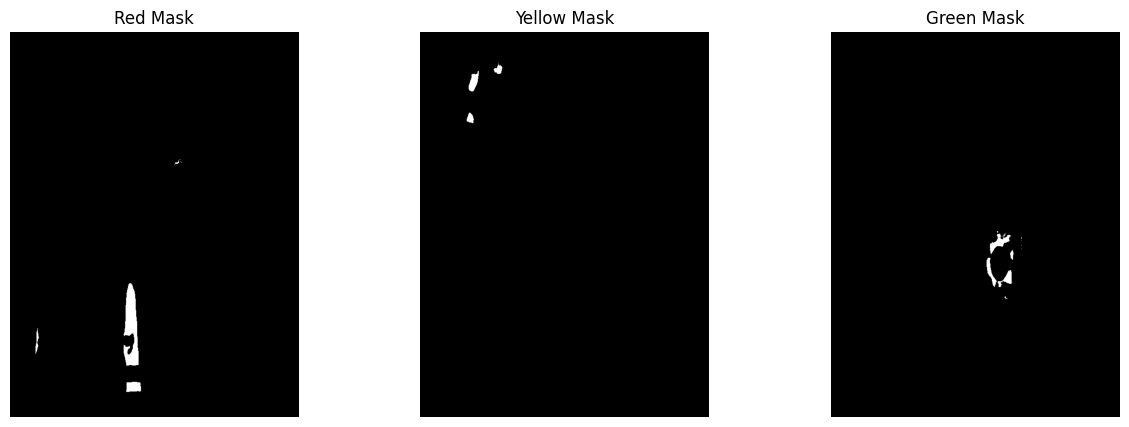

 Screenshot 2025-06-20 at 2.01.08 PM.png
 Red area: 3167.0,  Yellow area: 59.0,  Green area: 0



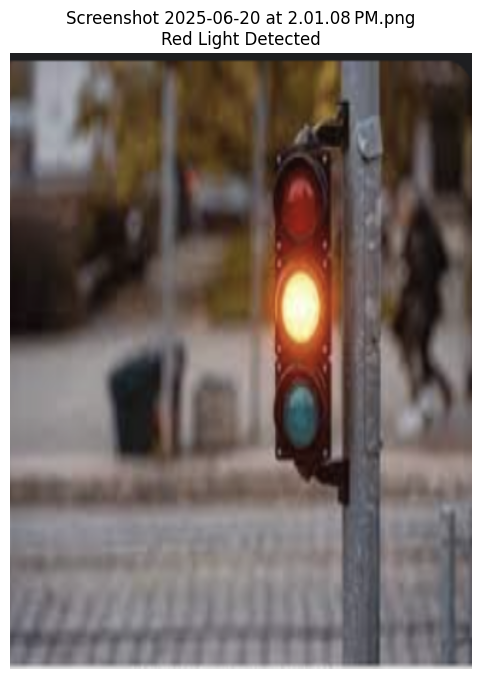

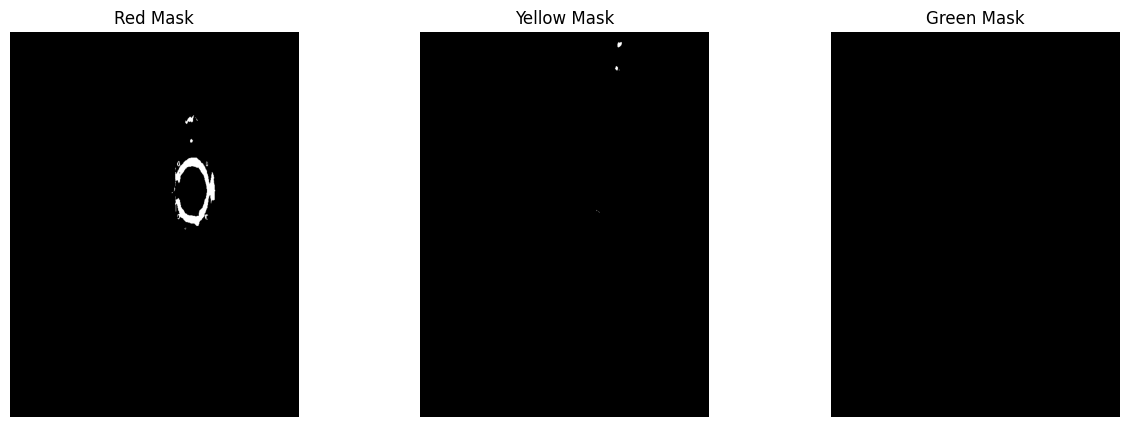

 Screenshot 2025-06-20 at 2.01.16 PM.png
 Red area: 6761.5,  Yellow area: 0,  Green area: 4630.5



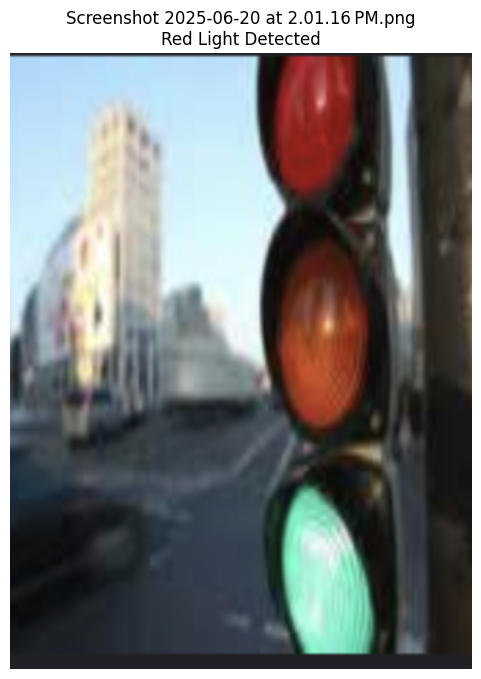

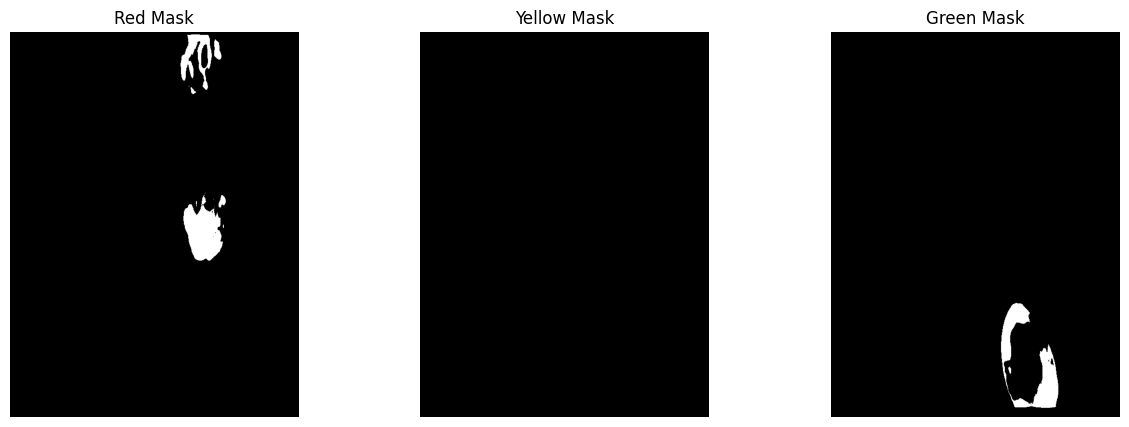

 Screenshot 2025-06-20 at 2.00.51 PM.png
 Red area: 99.0,  Yellow area: 430.5,  Green area: 533.5



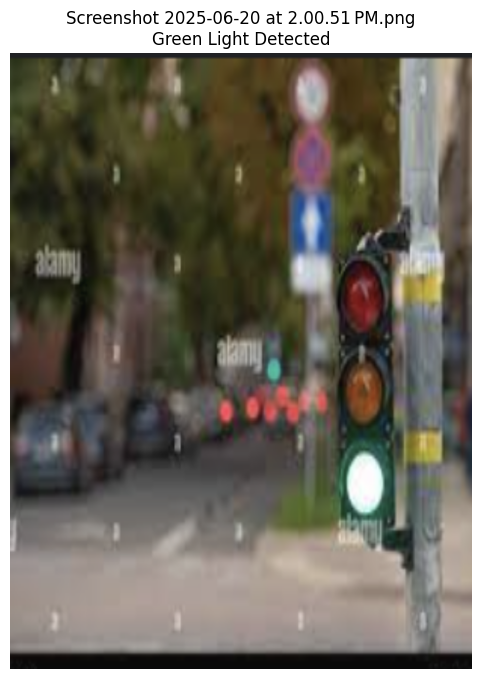

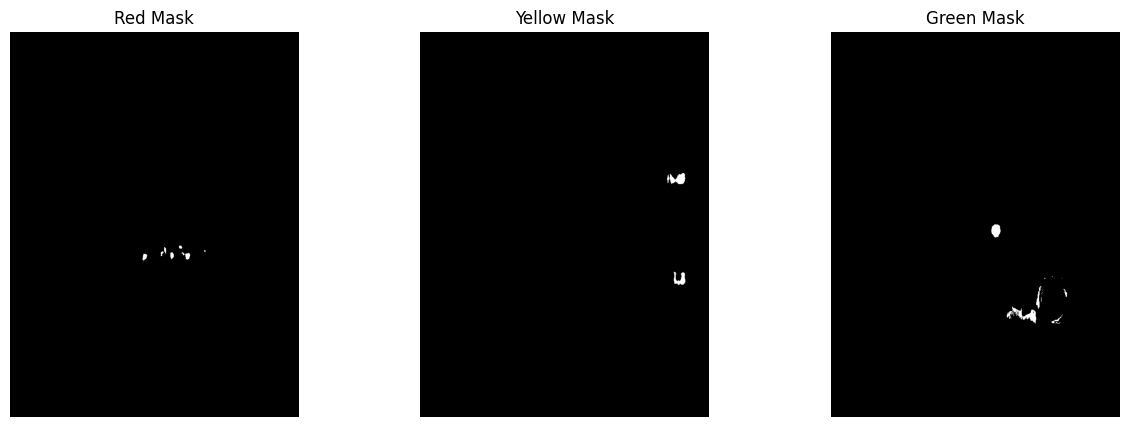

 traffic_light.png
 Red area: 17776.0,  Yellow area: 111.5,  Green area: 0



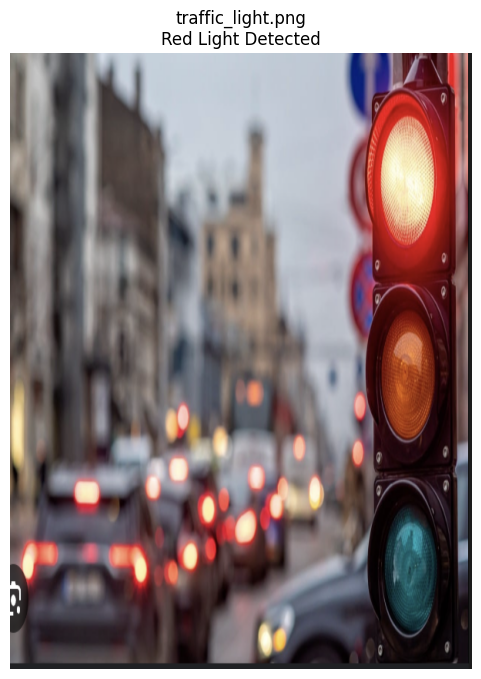

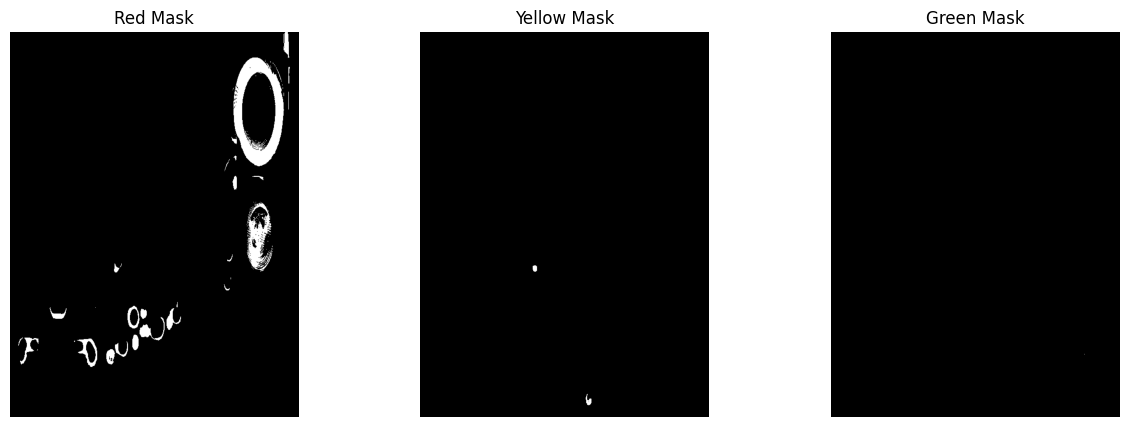

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

# we Listed all images in the current folder
folder_path = '.'  # this is our current working directory
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f" Found {len(image_files)} image(s) to process.\n")

# Define detection function
def detect_traffic_light(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Couldn't load: {image_path}")
        return

    image = cv2.resize(image, (600, 800))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # these are the HSV color ranges
    red_lower1 = np.array([0, 150, 150])
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([160, 150, 150])
    red_upper2 = np.array([180, 255, 255])

    yellow_lower = np.array([18, 150, 150])
    yellow_upper = np.array([35, 255, 255])

    green_lower = np.array([40, 100, 100])
    green_upper = np.array([90, 255, 255])

    # Create color masks
    mask_red1 = cv2.inRange(hsv, red_lower1, red_upper1)
    mask_red2 = cv2.inRange(hsv, red_lower2, red_upper2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)

    mask_yellow = cv2.inRange(hsv, yellow_lower, yellow_upper)
    mask_green = cv2.inRange(hsv, green_lower, green_upper)

    #it will show Largest contour area function
    def get_largest_contour_area(mask):
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        max_area = 0
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > max_area:
                max_area = area
        return max_area

    # the Calculated color areas
    red_area = get_largest_contour_area(mask_red)
    yellow_area = get_largest_contour_area(mask_yellow)
    green_area = get_largest_contour_area(mask_green)

    print(f" {image_path}")
    print(f" Red area: {red_area},  Yellow area: {yellow_area},  Green area: {green_area}\n")

    # the Decision logic
    min_area = 300
    areas = {
        "Red": red_area if red_area > min_area else 0,
        "Yellow": yellow_area if yellow_area > min_area else 0,
        "Green": green_area if green_area > min_area else 0,
    }

    dominant_color = max(areas, key=areas.get)
    if areas[dominant_color] > 0:
        result = f"{dominant_color} Light Detected"
    else:
        result = " No traffic light color detected"

    # this Shows image with result
    plt.figure(figsize=(6, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"{os.path.basename(image_path)}\n{result}")
    plt.show()

    # this Shows masks
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(mask_red, cmap='gray')
    plt.title("Red Mask")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask_yellow, cmap='gray')
    plt.title("Yellow Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(mask_green, cmap='gray')
    plt.title("Green Mask")
    plt.axis('off')

    plt.show()


for img_file in image_files:
    detect_traffic_light(img_file)
